# Custumers Custering

# <h3>Importing libraries</h3>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder



# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)




<h3>Loading the dataset</h3>

In [2]:
path = "customer_segmentation.csv"
df = pd.read_csv(path)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<h3>Basic insights of dataset</h3>

#### View data types, missing values and duplicates

In [3]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['Missing:np.nan'] = (df.isnull()).sum()
    summary_df['Missing:None'] = (df == "None").sum()
    summary_df['total'] = summary_df['Missing:np.nan'] + summary_df['Missing:None']
    summary_df['Percent'] = 100*summary_df['total']/len(df)
    summary_df['Duplicates'] = df.duplicated().sum()
    summary_df['Unique'] = df.nunique().values
    summary_df['Count'] = df.count().values
    return summary_df.sort_values(ascending = False, by = 'Percent')

summary(df).style.background_gradient(cmap='Blues')

,dtypes,Missing:np.nan,Missing:None,total,Percent,Duplicates,Unique,Count
Income,float64,24,0,24,1.071429,0,1974,2216
ID,int64,0,0,0,0.000000,0,2240,2240
NumDealsPurchases,int64,0,0,0,0.000000,0,15,2240
Z_Revenue,int64,0,0,0,0.000000,0,1,2240
Z_CostContact,int64,0,0,0,0.000000,0,1,2240
Complain,int64,0,0,0,0.000000,0,2,2240
AcceptedCmp2,int64,0,0,0,0.000000,0,2,2240
AcceptedCmp1,int64,0,0,0,0.000000,0,2,2240
AcceptedCmp5,int64,0,0,0,0.000000,0,2,2240
AcceptedCmp4,int64,0,0,0,0.000000,0,2,2240


In [4]:
# Dropping missing values
df.dropna(inplace=True)

In [5]:
# Change Dt_Customer data type from object to date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
dates = []

for i in df['Dt_Customer']:
  i = i.date()
  dates.append(i)

#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [6]:
# Calculate customer age untill 2014
df['Age_on_2014'] = 2014 - df['Year_Birth']

In [7]:
df.drop(["ID",'Year_Birth','Z_CostContact', 'Z_Revenue',"Dt_Customer"], axis = 1,inplace = True )

## Exploratory Data Analysis

In [8]:
df_uniques = df.nunique()
categorical_variables = list(df_uniques[df_uniques <=10].index)
numeric_variables = list(set(df.columns) - set(categorical_variables))
print("Categorical variables:", categorical_variables)
print("  "*15)
print("Numeric variables:", numeric_variables)

Categorical variables: ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
                              
Numeric variables: ['MntSweetProducts', 'NumStorePurchases', 'Age_on_2014', 'MntFishProducts', 'MntMeatProducts', 'NumCatalogPurchases', 'MntWines', 'MntGoldProds', 'Recency', 'Income', 'MntFruits', 'NumDealsPurchases', 'NumWebPurchases', 'NumWebVisitsMonth']


In [9]:
df.shape

(2216, 25)

<h3 align=center><font size = 5>Distribution of the Categorical Variables </font></h3>

In [10]:
def plot_bar(df, cols):
    fig, axes = plt.subplots(4, 3, figsize=(15, 20), dpi=100)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        counts = df[col].value_counts()
        counts.plot.bar(ax = axes[i],color= "#4477DA")
        axes[i].set_title("Distibution of " + col)
        axes[i].set_xlabel(col)
    plt.tight_layout()
    plt.show()

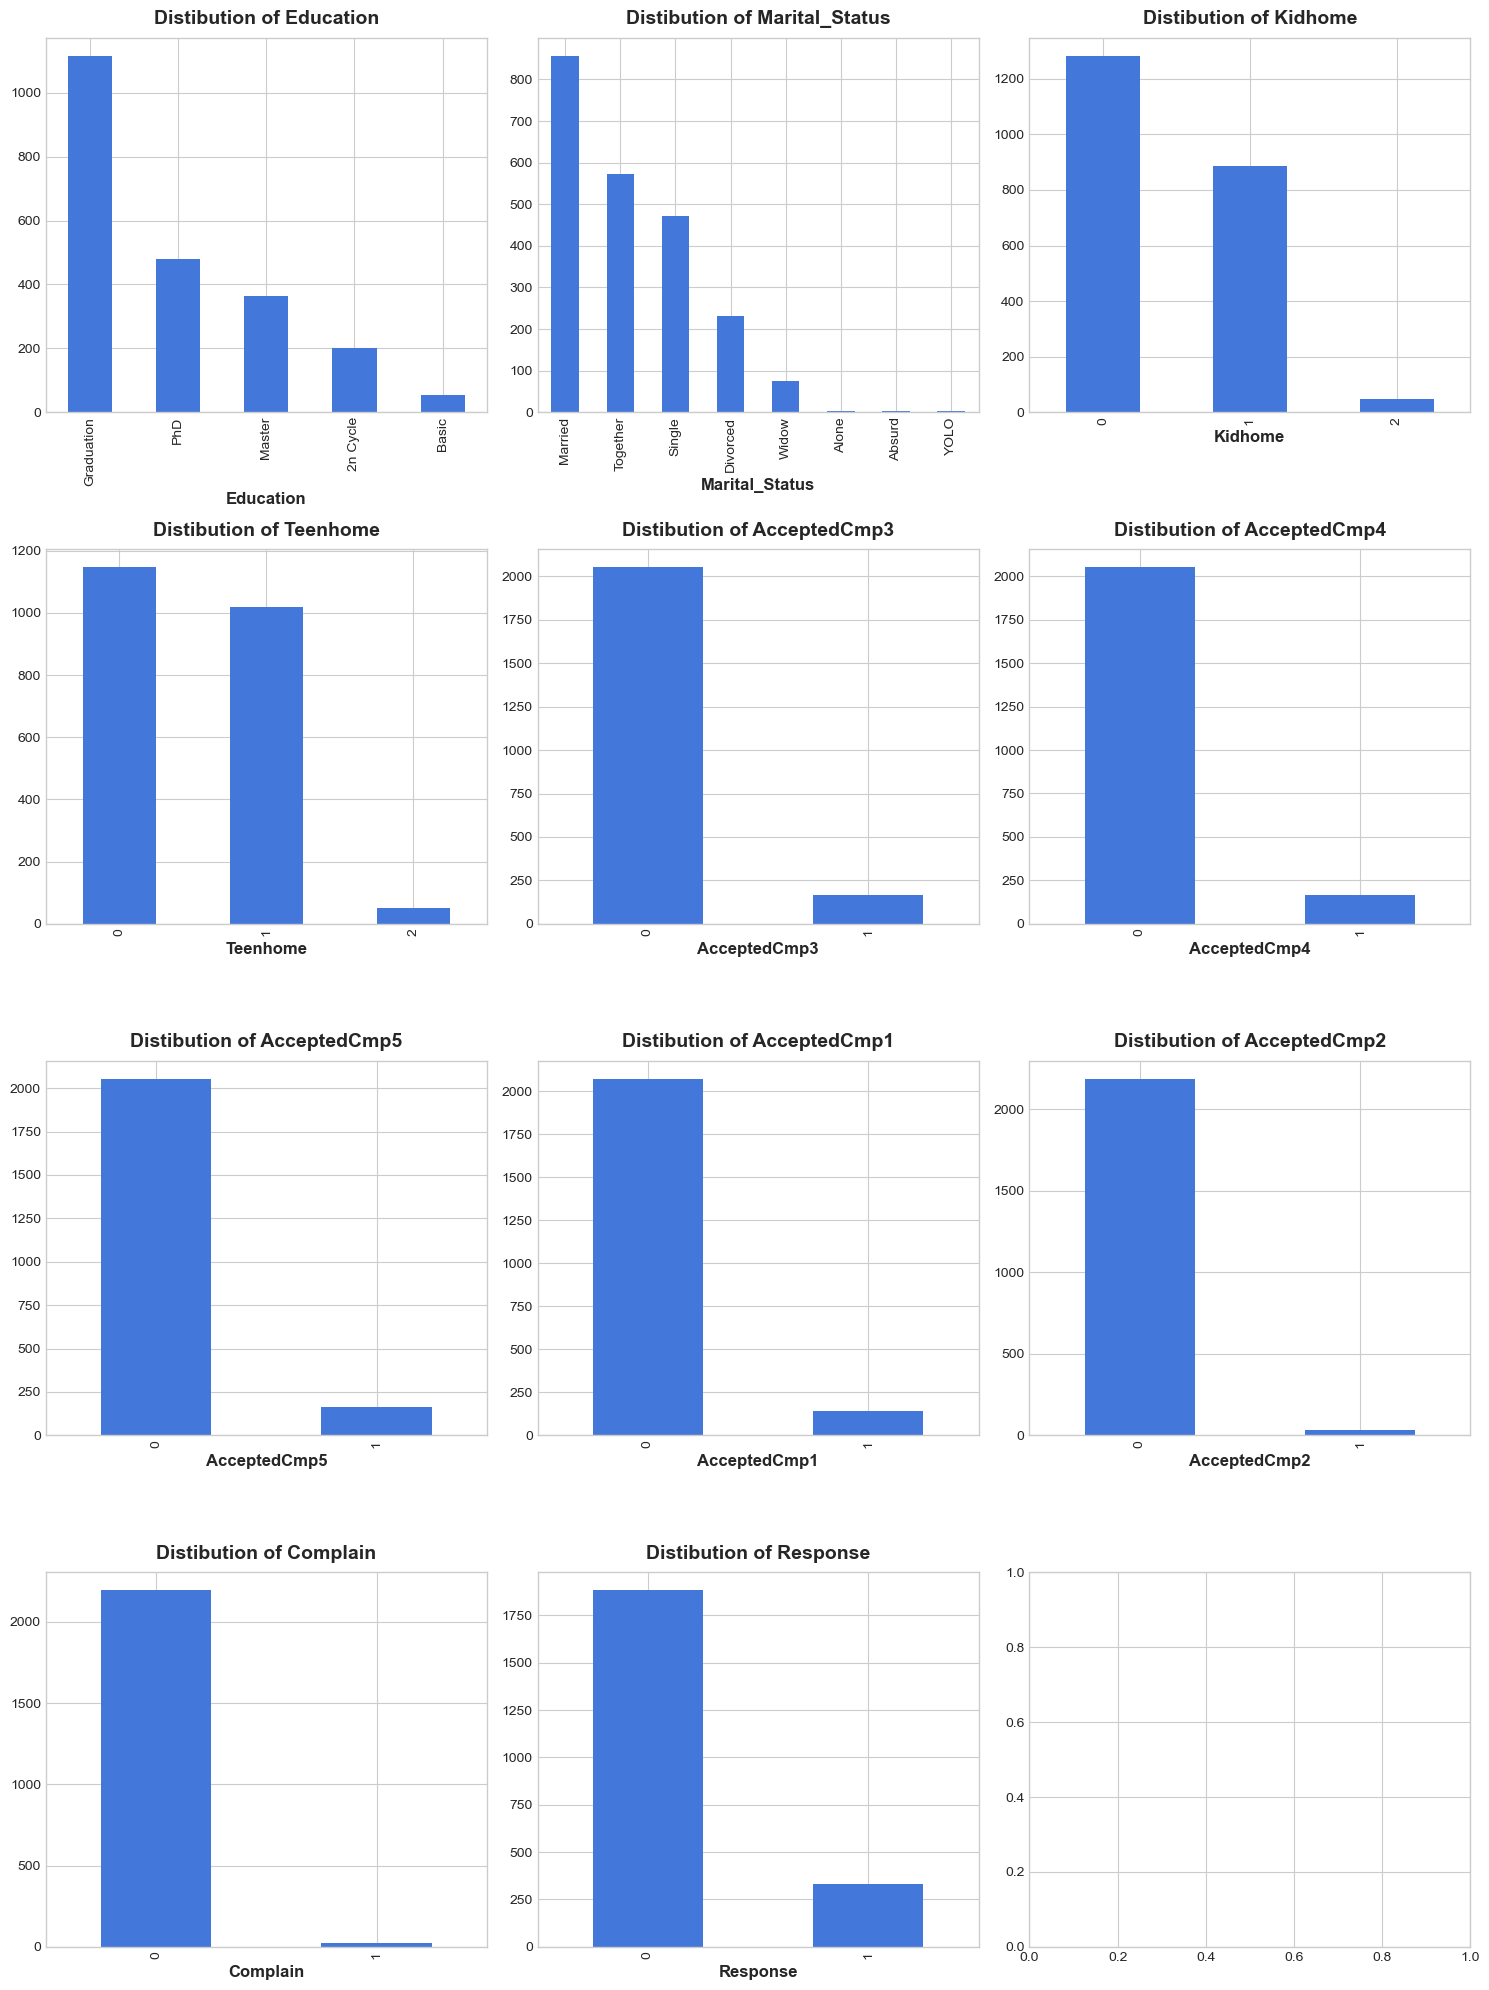

In [11]:
plot_bar(df, categorical_variables)

<h3 align=center><font size = 5>Distribution of the Numeric Variables </font></h3>

In [12]:
num = df[numeric_variables]

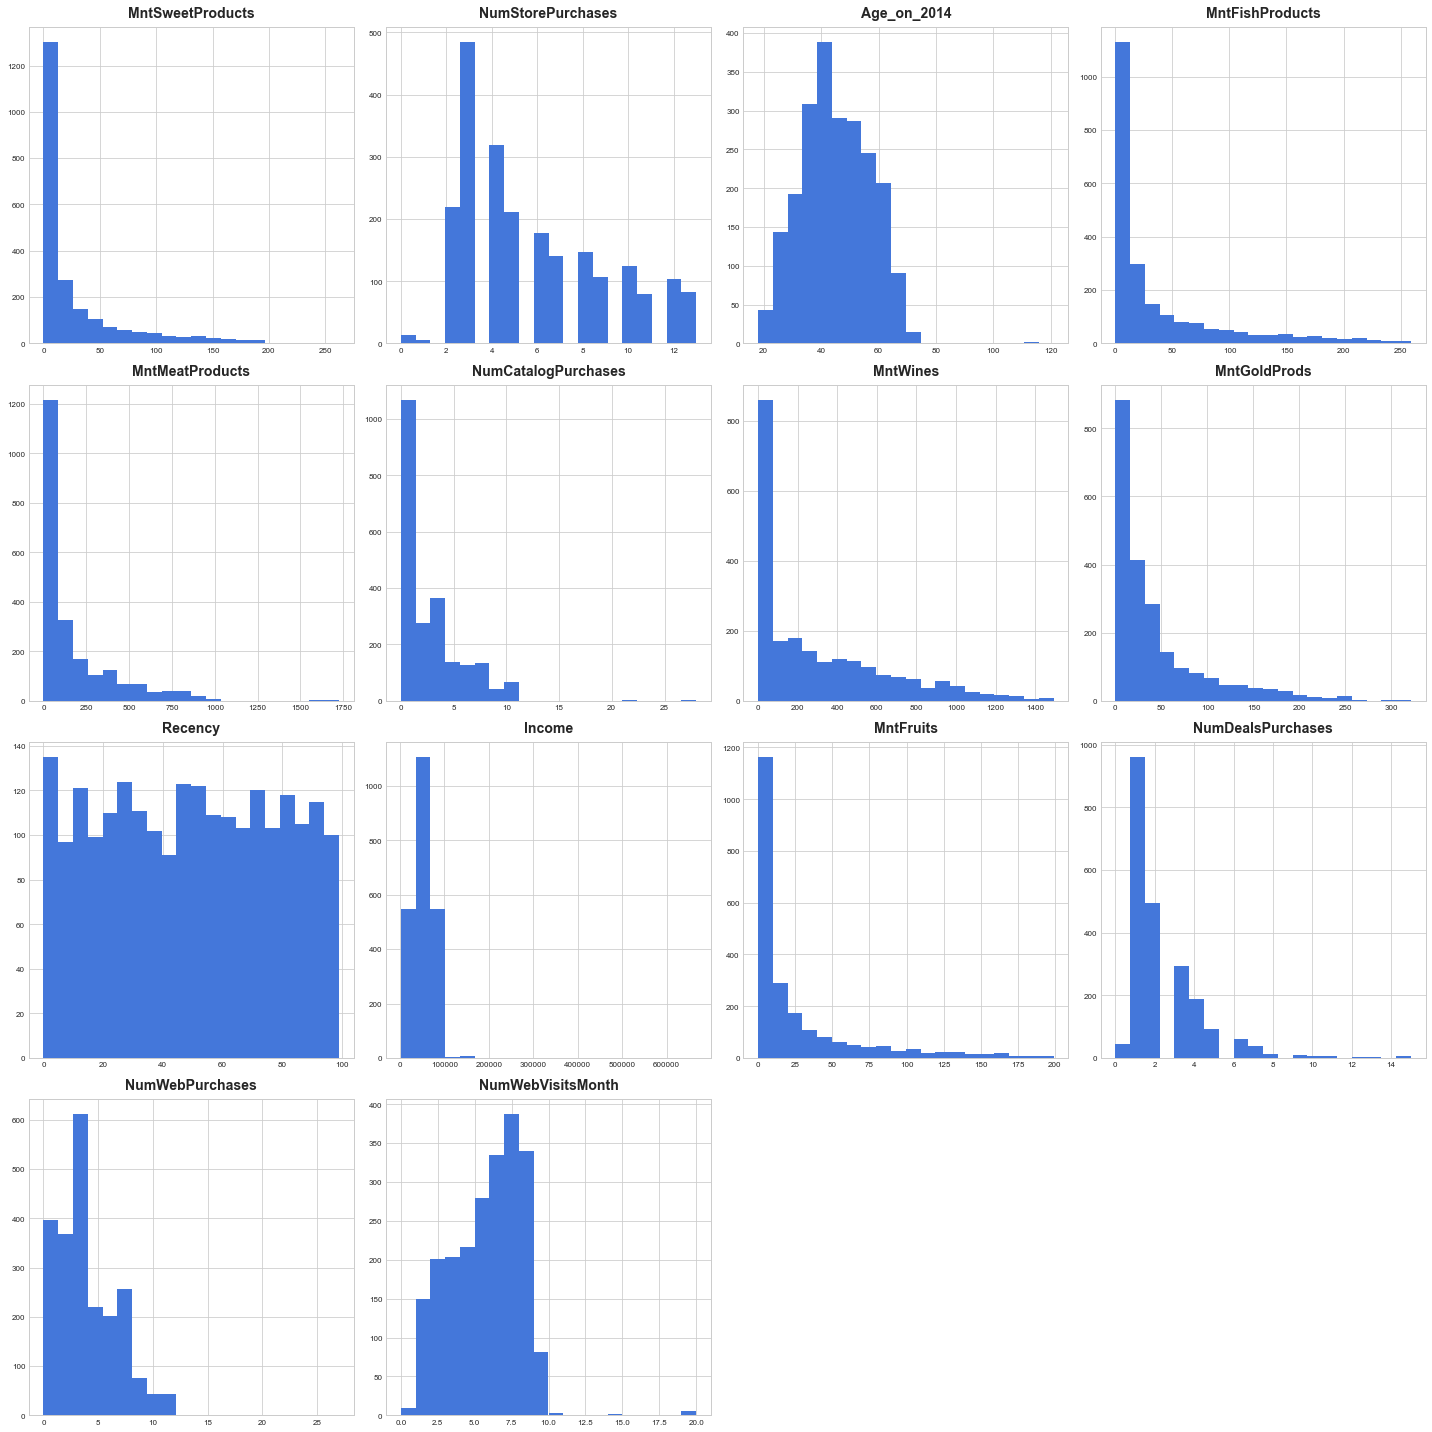

In [13]:
num.hist(figsize=(20, 20), bins=20, xlabelsize=8, ylabelsize=8,color = "#4477DA");

## Features Engneering

* 1- Merge Education(`2n Cycle` , `Basic`) into one class (`Pre_Graduation`), and `Master`, `PhD` into (`Post_Graduation`)


* 2- Merge Marital status (`Single`, `Divorced`, `Widow`, `Alone`, `Absurd`, `YOLO`) into one class (0), and (`Married` and `Togather`) into one class (1)


* 3- Combine `Kidhome` and `Teenhome` into one column `Children` then merge class 1 and 2 into one class (1)


* 4- Combine `Acceptedcmp1` - `Acceptedcmp5` into one column `Acceptedcmps`


* 5- Combine `MntsweetProducts`,  `MntWines,MntFruits`, `MntFishProducts`, `MntMeatPriducts`, `MntGoldProd` into one column (`MntProducts`)


* 6- Combine `NumWebPurchases`,  `NumStorePurchases`, `NumDealsPurchases`, `NumCatalogPurchases` into one column (`NumPurchases`)

* 7- Lets create a social engagement score which is nothing but adding `Accrptedcmps`, `Complains`, `Response` toghather

* 8- Delete the original columns



In [14]:
#1 
df['Education'] = df['Education'].replace({"PhD": "Post_Graduation", "Master": "Post_Graduation", "2n Cycle": "Pre_Graduation", "Basic": "Pre_Graduation"})

In [15]:
df['Education'].value_counts()

Graduation         1116
Post_Graduation     846
Pre_Graduation      254
Name: Education, dtype: int64

In [16]:
#2
df['Marital_Status'] = df['Marital_Status'].replace({"Single":0, "Divorced":0, "Widow":0, "Alone":0, "Absurd":0, "YOLO":0, "Married":1, "Together":1})

In [17]:
df['Marital_Status'].value_counts()

1    1430
0     786
Name: Marital_Status, dtype: int64

In [18]:
#3
Children = ["Kidhome" , "Teenhome"]
df["Children"] = df[Children].sum(axis=1)

df[Children + ["Children"]].head()

,Kidhome,Teenhome,Children
0,0,0,0
1,1,1,2
2,0,0,0
3,1,0,1
4,1,0,1


In [19]:
df['Children'].value_counts()

1    1117
0     633
2     416
3      50
Name: Children, dtype: int64

In [20]:
#4
AcceptedCmp =[ "AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4", "AcceptedCmp5"]
df["AcceptedCmp"] = df[AcceptedCmp].sum(axis=1)

df[AcceptedCmp + ["AcceptedCmp"]].tail()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp
2235,0,0,0,0,0,0
2236,1,0,0,0,0,1
2237,0,0,0,1,0,1
2238,0,0,0,0,0,0
2239,0,0,0,0,0,0


In [21]:
df['AcceptedCmp'].value_counts()

0    1757
1     323
2      81
3      44
4      11
Name: AcceptedCmp, dtype: int64

In [22]:
df['AcceptedCmp'] = df['AcceptedCmp'].replace({1:1, 2:1 ,3:1, 4:1})

In [23]:
df['AcceptedCmp'].value_counts()

0    1757
1     459
Name: AcceptedCmp, dtype: int64

In [24]:
#5
MntProducts = ["MntSweetProducts", "MntWines" ,"MntFruits", "MntFishProducts", "MntMeatProducts", "MntGoldProds"]
df["MntProducts"] = df[MntProducts].sum(axis = 1)
df[MntProducts+["MntProducts"]].head()

,MntSweetProducts,MntWines,MntFruits,MntFishProducts,MntMeatProducts,MntGoldProds,MntProducts
0,88,635,88,172,546,88,1617
1,1,11,1,2,6,6,27
2,21,426,49,111,127,42,776
3,3,11,4,10,20,5,53
4,27,173,43,46,118,15,422


In [25]:
#6
NumPurchases = ["NumWebPurchases", "NumStorePurchases", "NumDealsPurchases", "NumCatalogPurchases"]
df["NumPurchases"] = df[NumPurchases].sum(axis = 1)

df[NumPurchases + ["NumPurchases"]].head()

,NumWebPurchases,NumStorePurchases,NumDealsPurchases,NumCatalogPurchases,NumPurchases
0,8,4,3,10,25
1,1,2,2,1,6
2,8,10,1,2,21
3,2,4,2,0,8
4,5,6,5,3,19


In [28]:
#7

engagement_score = ['AcceptedCmp', "Complain", "Response"]
df["engagement_score"] = df[engagement_score].sum(axis = 1)
df[engagement_score + ["engagement_score"]].head()

,AcceptedCmp,Complain,Response,engagement_score
0,0,0,1,1
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [29]:
#8

df.drop(["Kidhome" , "Teenhome","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4", "AcceptedCmp5","MntSweetProducts", "MntWines" ,"MntFruits", "MntFishProducts", "MntMeatProducts", "MntGoldProds","NumWebPurchases", "NumStorePurchases", "NumDealsPurchases", "NumCatalogPurchases", "Complain", "Response" ],axis = 1, inplace = True)

In [31]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Age_on_2014,Children,AcceptedCmp,MntProducts,NumPurchases,engagement_score
0,Graduation,0,58138.0,58,7,57,0,0,1617,25,1
1,Graduation,0,46344.0,38,5,60,2,0,27,6,0
2,Graduation,1,71613.0,26,4,49,0,0,776,21,0
3,Graduation,1,26646.0,26,6,30,1,0,53,8,0
4,Post_Graduation,1,58293.0,94,5,33,1,0,422,19,0


## Data Preprocessing

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Age_on_2014,Children,AcceptedCmp,MntProducts,NumPurchases,engagement_score
0,0,0,58138.0,58,7,57,0,0,1617,25,1
1,0,0,46344.0,38,5,60,2,0,27,6,0
2,0,1,71613.0,26,4,49,0,0,776,21,0
3,0,1,26646.0,26,6,30,1,0,53,8,0
4,1,1,58293.0,94,5,33,1,0,422,19,0


In [ ]:
## Correlation

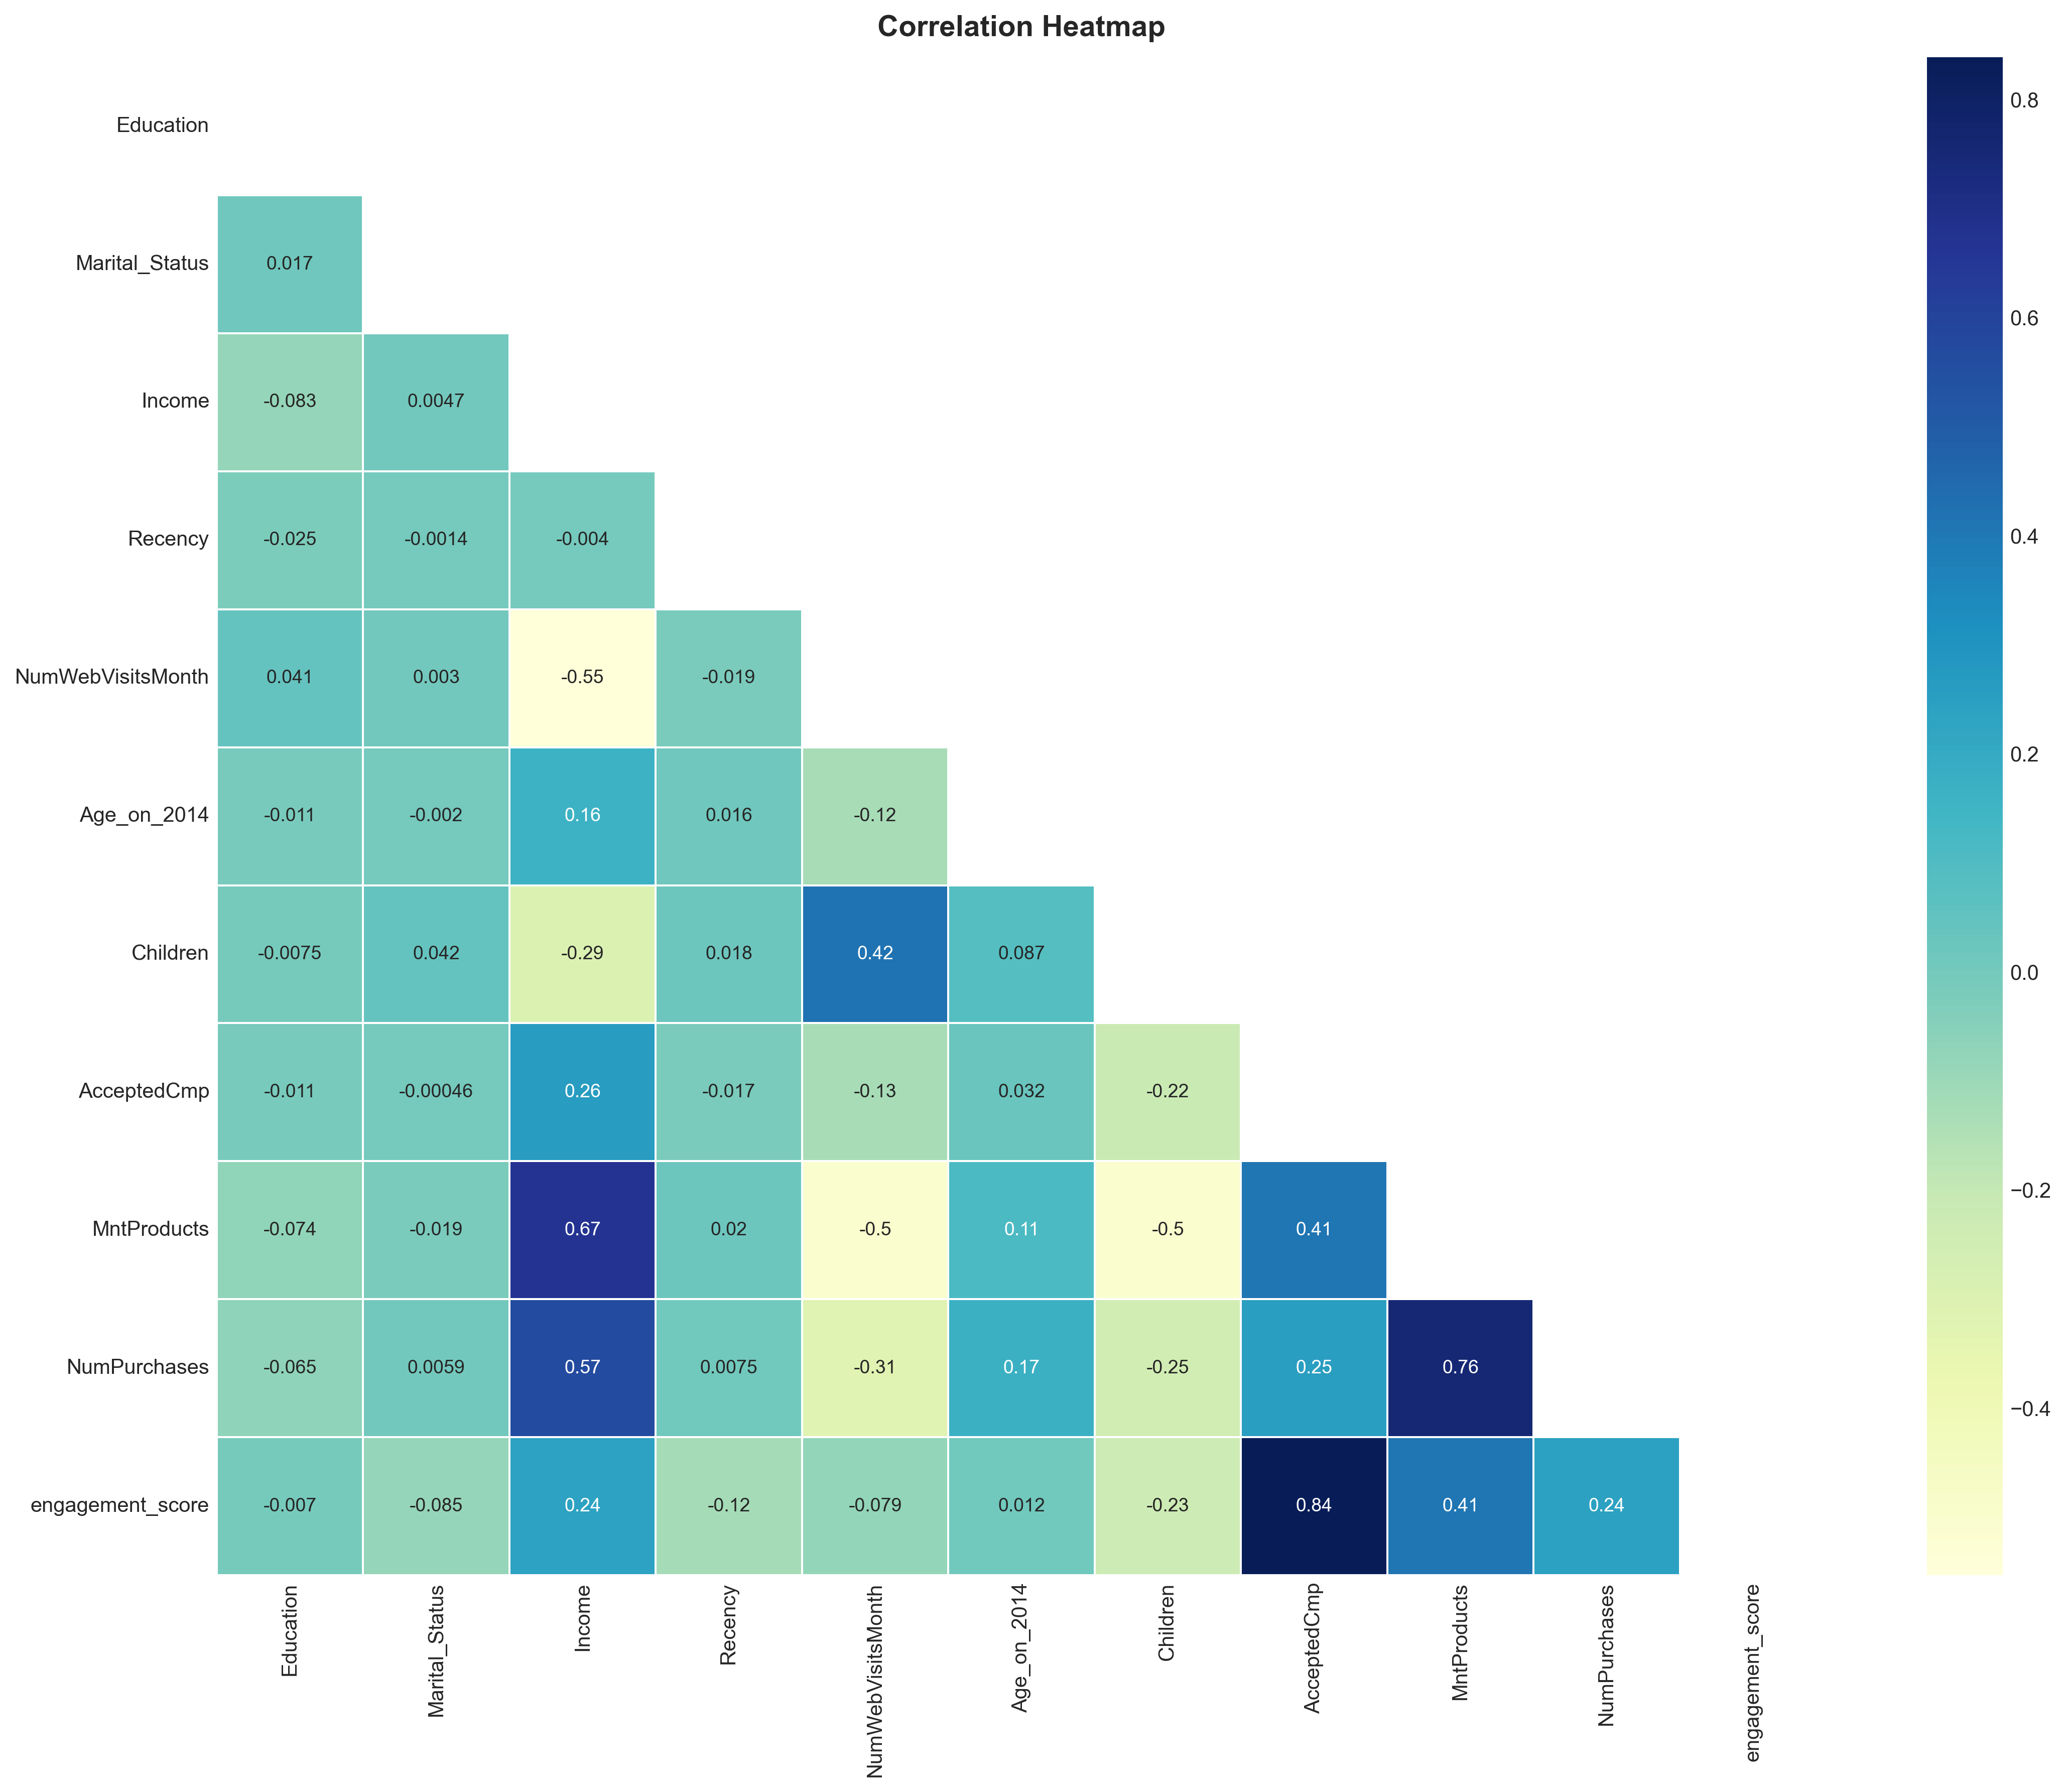

In [33]:
# Plot correlation heatmap
plt.figure(figsize=(15, 12), dpi=300)
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='YlGnBu', linewidth=.5, annot_kws={'size': 9})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## Customers Segmentation base on thier demographic inforamation

### K-means clustering

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [39]:
demographic_df = df[['Education', 'Marital_Status', 'Income','Children' , 'Age_on_2014']]

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
demographic_df_scaled = scaler.fit_transform(demographic_df)
demographic_df_scaled = pd.DataFrame(demographic_df_scaled, columns = demographic_df.columns)
demographic_df_scaled.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Education,2216.0,-0.0,1.0,-0.894,-0.894,-0.894,0.569,2.033
Marital_Status,2216.0,-0.0,1.0,-1.349,-1.349,0.741,0.741,0.741
Income,2216.0,0.0,1.0,-2.007,-0.673,-0.034,0.647,24.413
Children,2216.0,-0.0,1.0,-1.265,-1.265,0.071,0.071,2.741
Age_on_2014,2216.0,0.0,1.0,-2.268,-0.683,-0.098,0.820,6.327


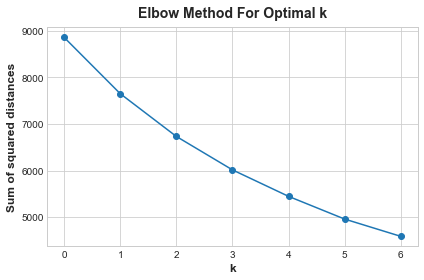

In [45]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(demographic_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters

plt.plot(ssd, marker = "o")
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show();

In [46]:
# Silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(demographic_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.13816755201744732
For n_clusters=3, the silhouette score is 0.13827451034999322
For n_clusters=4, the silhouette score is 0.07816966868953516
For n_clusters=5, the silhouette score is 0.040930519184625216
For n_clusters=6, the silhouette score is 0.043204307980901725
For n_clusters=7, the silhouette score is 0.015151296921385374
For n_clusters=8, the silhouette score is 0.004014703072722355


In [47]:
# Final model with k=3
kmeans = KMeans(n_clusters=2, max_iter=50, random_state=42)
labels =kmeans.fit_predict(df)

In [48]:
# assign the label
demographic_df_scaled['Cluster'] = kmeans.labels_
demographic_df_scaled.head()

,Education,Marital_Status,Income,Children,Age_on_2014,Cluster
0,-0.894187,-1.348829,0.234063,-1.264803,0.986443,1
1,-0.894187,-1.348829,-0.234559,1.405806,1.236801,0
2,-0.894187,0.741384,0.769478,-1.264803,0.318822,1
3,-0.894187,0.741384,-1.017239,0.070501,-1.266777,0
4,0.569268,0.741384,0.240221,0.070501,-1.016420,1


### Numerical Variables by Cluster

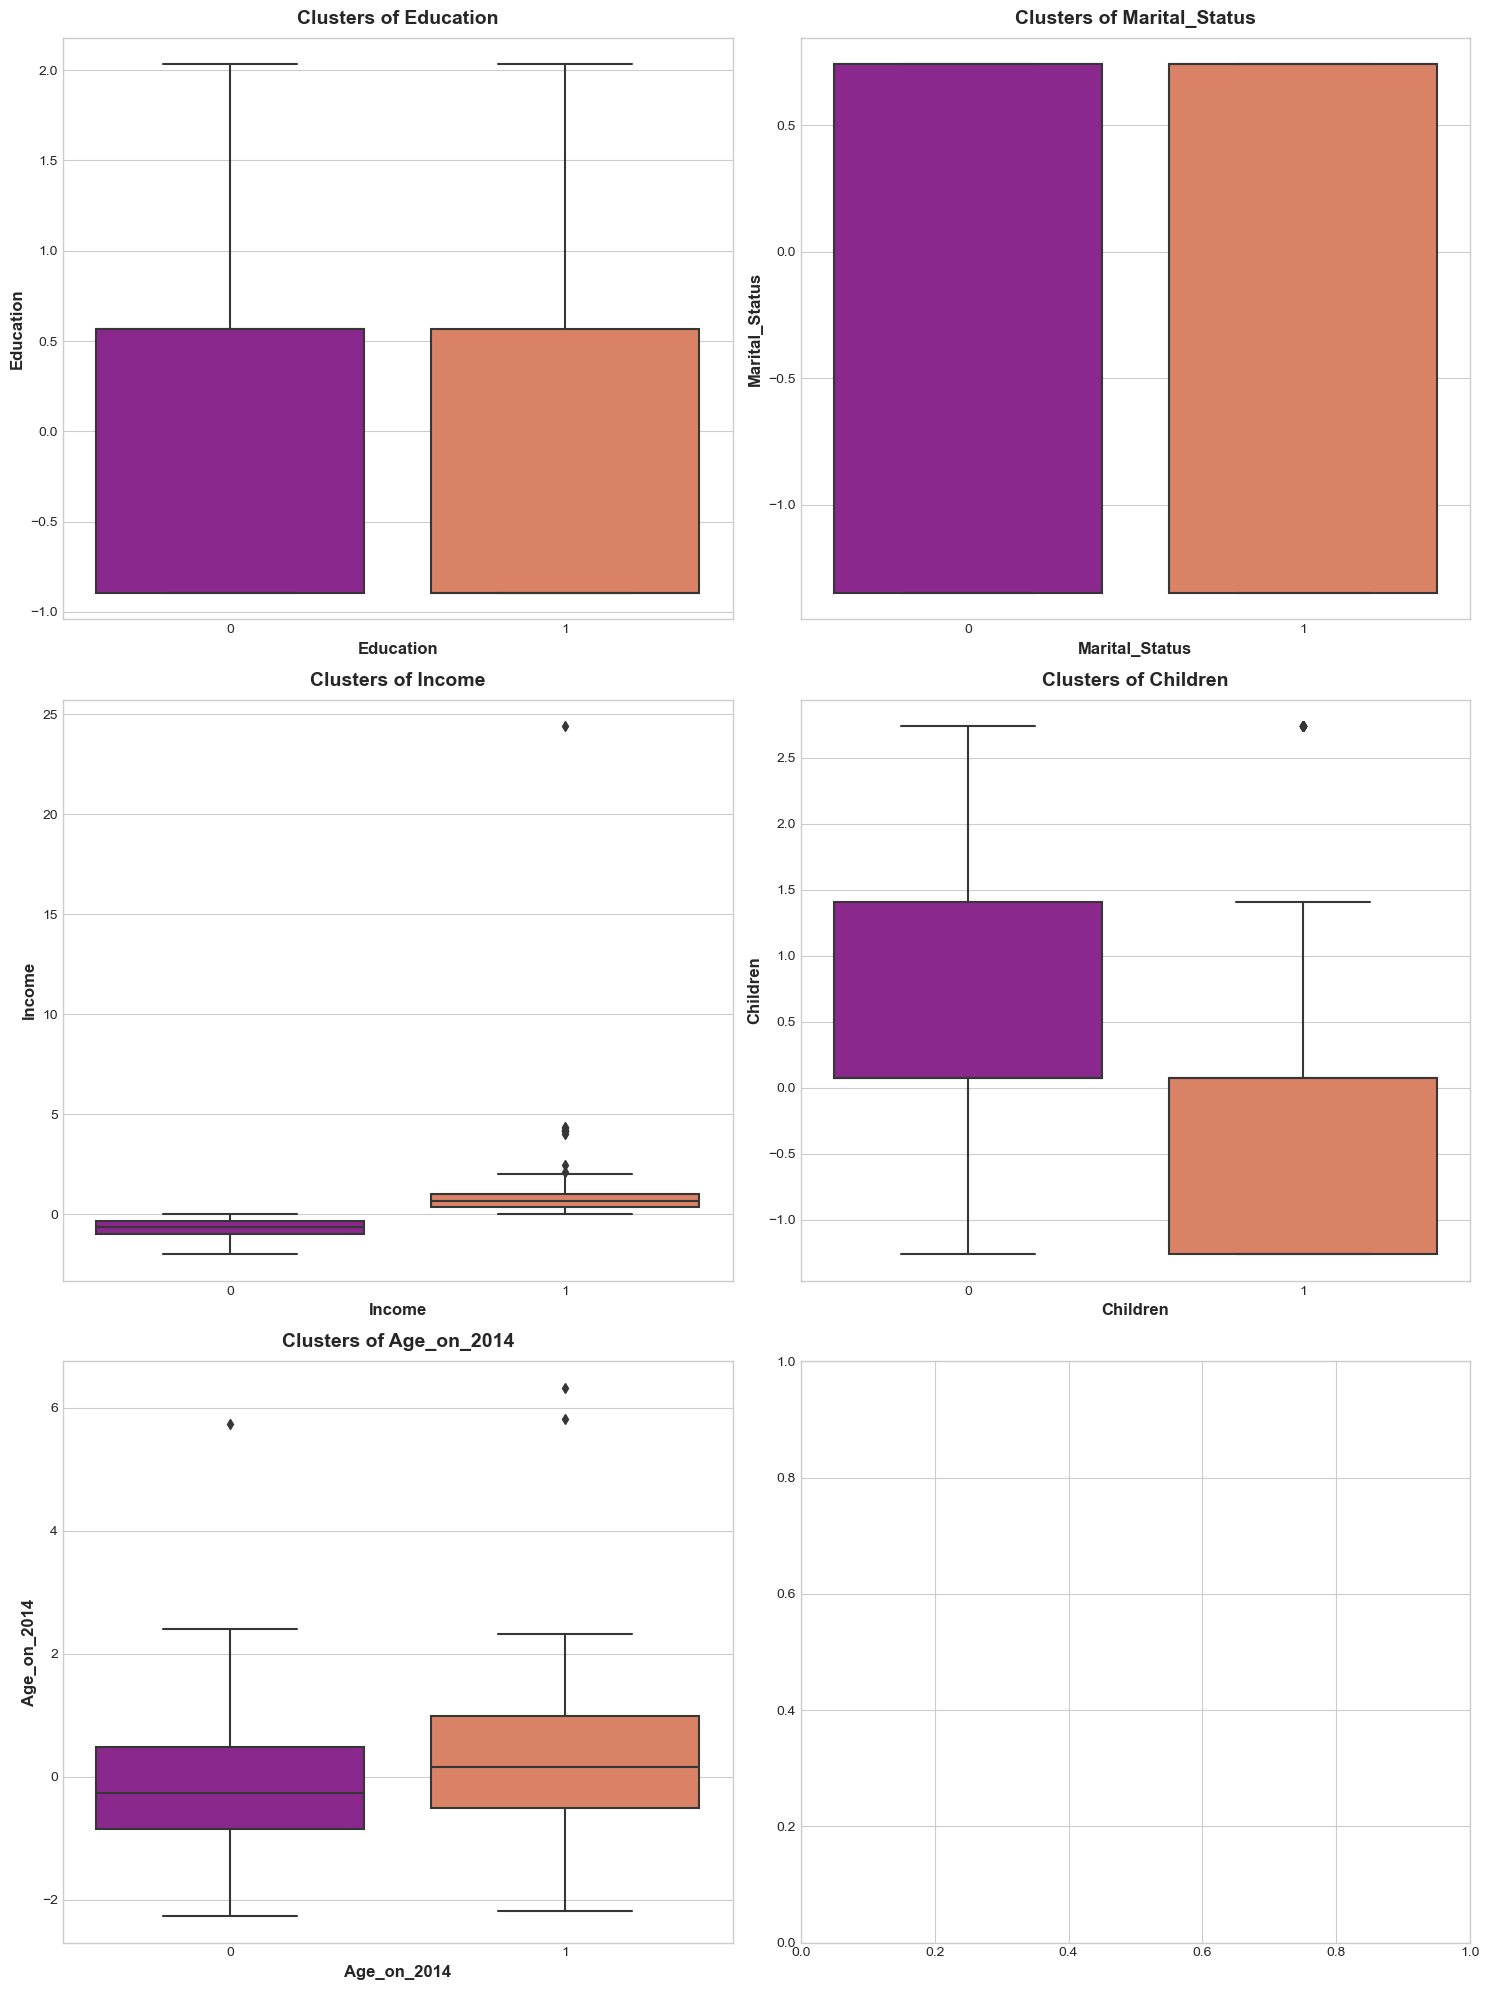

In [49]:
num = ['Education', 'Marital_Status', 'Income', 'Children', 'Age_on_2014']
def plot_box(df, cols, col_x = 'Cluster' ):
    fig, axes = plt.subplots(3, 2, figsize=(15, 20), dpi=100)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.boxplot( col_x, col,ax = axes[i], data = df,  palette='plasma')
        axes[i].set_title("Clusters of " + col)
        axes[i].set_xlabel(col)
        
    plt.tight_layout()
    plt.show()
plot_box(demographic_df_scaled, num )

### Visualizing the clusters

In [50]:
df_demo= demographic_df_scaled.reset_index()

In [51]:
y = df_demo["Cluster"]
X = df_demo.drop(["Cluster"], axis=1)

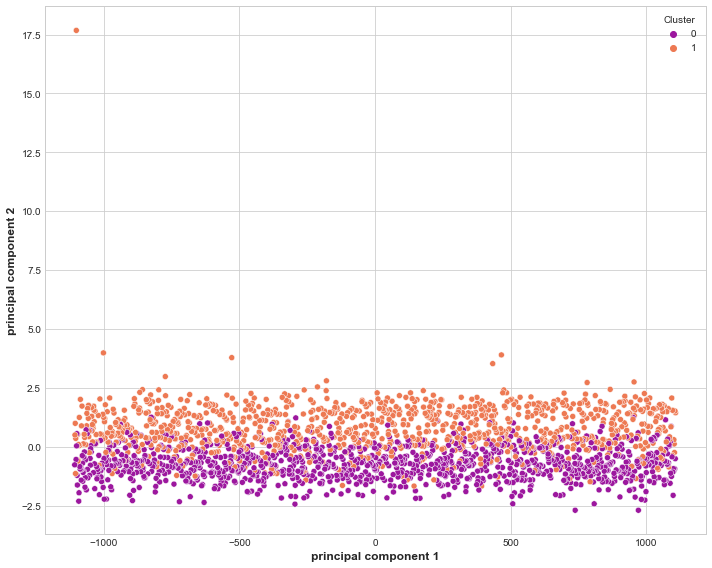

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(X)
pca_df = pd.DataFrame(data = pca_fit, columns = ['principal component 1', 'principal component 2'])
final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
pca_df['Cluster'] = final_df['Cluster']
plt.figure(figsize=(10,8))
sns.scatterplot(data=pca_df, x='principal component 1', y='principal component 2', hue='Cluster', palette='plasma')
plt.show()

### Agglomerative Clustering

In [53]:

from sklearn.cluster import AgglomerativeClustering


hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hc_labels=hc.fit_predict(final_df)

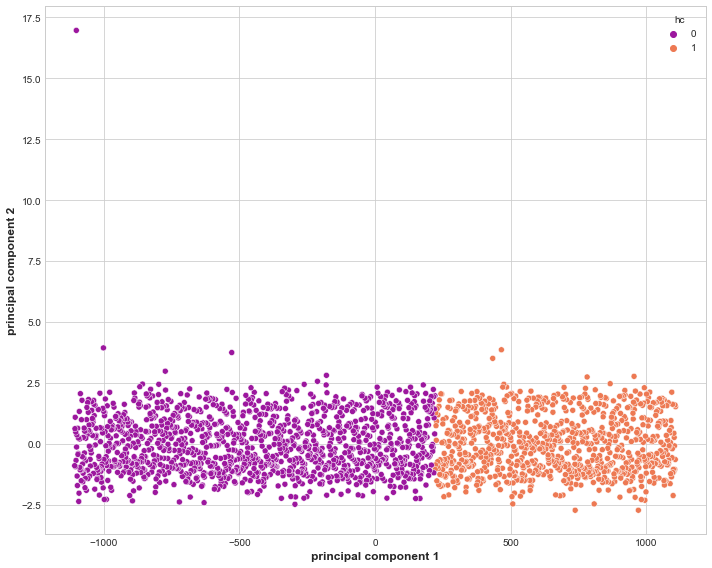

In [54]:
df_hc = pd.concat([final_df, pd.DataFrame({'hc':hc_labels})], axis = 1)
df_hc.head()

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(final_df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['hc'] = df_hc['hc']
plt.figure(figsize=(10,8))
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue='hc', palette='plasma')
plt.show()

### Evaluation

In [55]:
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
print("Silhouette Score (KMeans): ", metrics.silhouette_score(final_df, labels))
print("Calinski-Harabasz Index (KMeans): ", metrics.calinski_harabasz_score(final_df, labels))
print("Davies-Bouldin Index (KMeans): ", metrics.davies_bouldin_score(final_df, labels))
print("  ")
print("_"*70)
print("  ")
print("Silhouette Score (Hierarchical Clustering):", silhouette_score(final_df, hc.labels_))
print("Calinski-Harabasz Index (Hierarchical Clustering):", calinski_harabasz_score(final_df, hc.labels_))
print("Davies-Bouldin Index (Hierarchical Clustering):", davies_bouldin_score(final_df, hc.labels_))

Silhouette Score (KMeans):  -0.000690287178636747
Calinski-Harabasz Index (KMeans):  0.32183857177222003
Davies-Bouldin Index (KMeans):  71.78224241783647
  
______________________________________________________________________
  
Silhouette Score (Hierarchical Clustering): 0.6027104841100771
Calinski-Harabasz Index (Hierarchical Clustering): 5697.653172945095
Davies-Bouldin Index (Hierarchical Clustering): 0.5000173903327079


### Customers Segmentation Based on thier purchasing behavior

In [56]:
purchasing_behavior_df = df[['Income', 'Recency', 'NumWebVisitsMonth', 'AcceptedCmp', 'MntProducts', 'NumPurchases', 'engagement_score']]

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
purchasing_behavior_df_scaled = scaler.fit_transform(purchasing_behavior_df)
purchasing_behavior_df_scaled = pd.DataFrame(purchasing_behavior_df_scaled, columns = purchasing_behavior_df.columns)
purchasing_behavior_df_scaled.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,0.0,1.0,-2.007,-0.673,-0.034,0.647,24.413
Recency,2216.0,-0.0,1.0,-1.693,-0.864,-0.000,0.863,1.727
NumWebVisitsMonth,2216.0,0.0,1.0,-2.194,-0.956,0.281,0.693,6.054
AcceptedCmp,2216.0,-0.0,1.0,-0.511,-0.511,-0.511,-0.511,1.956
MntProducts,2216.0,0.0,1.0,-0.999,-0.893,-0.349,0.732,3.182
NumPurchases,2216.0,-0.0,1.0,-1.940,-0.897,0.016,0.798,3.797
engagement_score,2216.0,0.0,1.0,-0.576,-0.576,-0.576,0.994,4.135


### Kmeans clustering

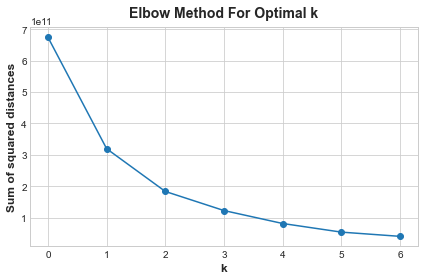

In [58]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(purchasing_behavior_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters

plt.plot(ssd, marker = "o")
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show();

In [59]:
# Silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(purchasing_behavior_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.27748898496319657
For n_clusters=3, the silhouette score is 0.27803519342382005
For n_clusters=4, the silhouette score is 0.12824490415730777
For n_clusters=5, the silhouette score is 0.060668232520965086
For n_clusters=6, the silhouette score is 0.05772089688897046
For n_clusters=7, the silhouette score is 0.024870646307610978
For n_clusters=8, the silhouette score is 0.009592142055661836


In [60]:
# Final model with k=2
kmeans = KMeans(n_clusters=2, max_iter=50, random_state=42)
labels =kmeans.fit_predict(df)

In [61]:
# assign the label
purchasing_behavior_df_scaled['Cluster'] = kmeans.labels_
purchasing_behavior_df_scaled.head()

,Income,Recency,NumWebVisitsMonth,AcceptedCmp,MntProducts,NumPurchases,engagement_score,Cluster
0,0.234063,0.310532,0.693232,-0.511117,1.675488,1.319446,0.994165,1
1,-0.234559,-0.380509,-0.131574,-0.511117,-0.962358,-1.157987,-0.576091,0
2,0.769478,-0.795134,-0.543978,-0.511117,0.280250,0.797881,-0.576091,1
3,-1.017239,-0.795134,0.280829,-0.511117,-0.919224,-0.897205,-0.576091,0
4,0.240221,1.554407,-0.131574,-0.511117,-0.307044,0.537099,-0.576091,1


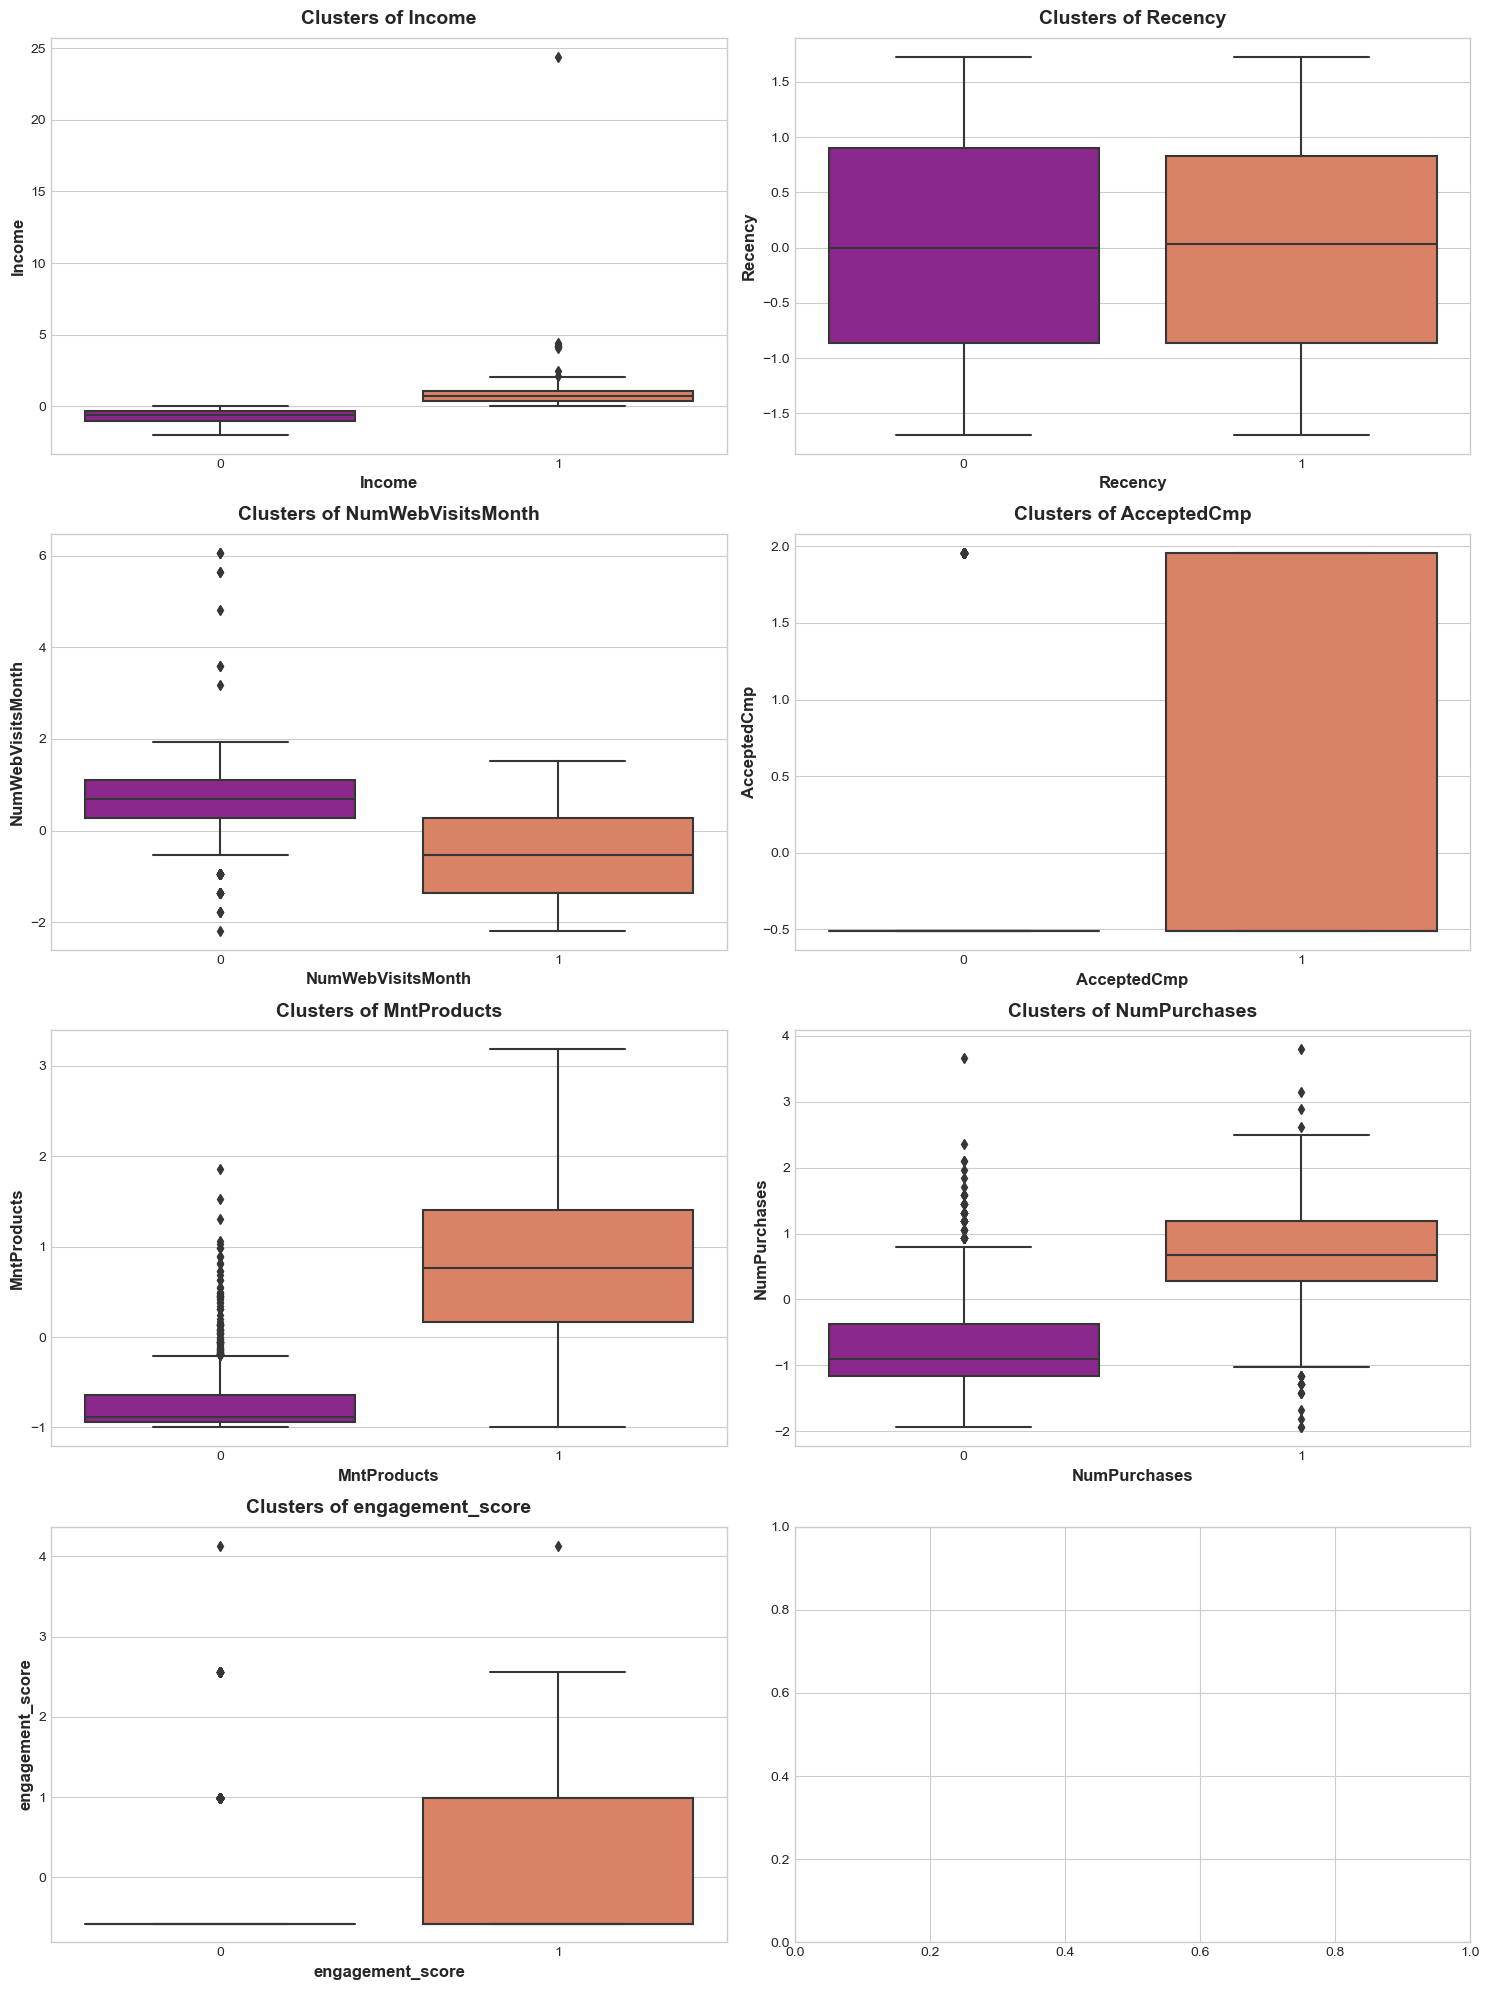

In [62]:
num = ['Income', 'Recency', 'NumWebVisitsMonth', 'AcceptedCmp', 'MntProducts', 'NumPurchases', 'engagement_score']
def plot_box(df, cols, col_x = 'Cluster' ):
    fig, axes = plt.subplots(4, 2, figsize=(15, 20), dpi=100)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.boxplot( col_x, col,ax = axes[i], data = df,  palette='plasma')
        axes[i].set_title("Clusters of " + col)
        axes[i].set_xlabel(col)
        
    plt.tight_layout()
    plt.show()
plot_box(purchasing_behavior_df_scaled, num )

In [63]:
df_purc= purchasing_behavior_df_scaled.reset_index()

In [64]:
y = df_purc["Cluster"]
X = df_purc.drop(["Cluster"], axis=1)

In [65]:
X.head()

,index,Income,Recency,NumWebVisitsMonth,AcceptedCmp,MntProducts,NumPurchases,engagement_score
0,0,0.234063,0.310532,0.693232,-0.511117,1.675488,1.319446,0.994165
1,1,-0.234559,-0.380509,-0.131574,-0.511117,-0.962358,-1.157987,-0.576091
2,2,0.769478,-0.795134,-0.543978,-0.511117,0.280250,0.797881,-0.576091
3,3,-1.017239,-0.795134,0.280829,-0.511117,-0.919224,-0.897205,-0.576091
4,4,0.240221,1.554407,-0.131574,-0.511117,-0.307044,0.537099,-0.576091


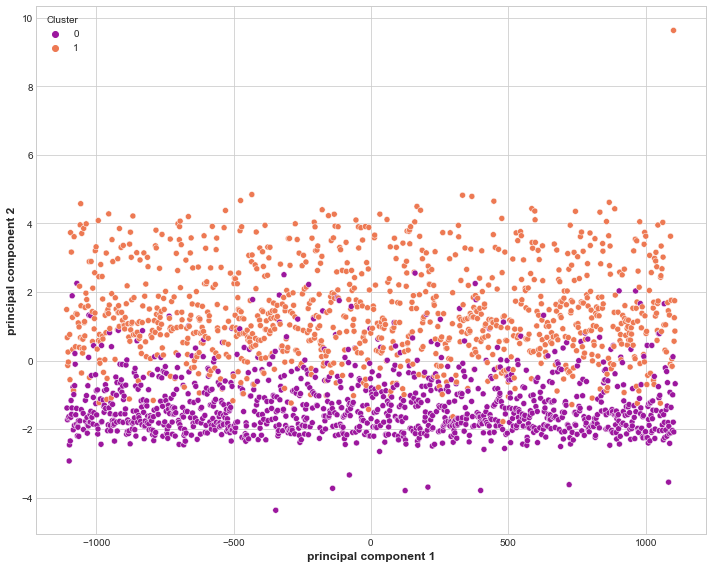

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(X)
pca_df = pd.DataFrame(data = pca_fit, columns = ['principal component 1', 'principal component 2'])
final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
pca_df['Cluster'] = final_df['Cluster']
plt.figure(figsize=(10,8))
sns.scatterplot(data=pca_df, x='principal component 1', y='principal component 2', hue='Cluster', palette='plasma')
plt.show()

### Hierarchical Clustering

In [67]:

from sklearn.cluster import AgglomerativeClustering


hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hc_labels=hc.fit_predict(final_df)

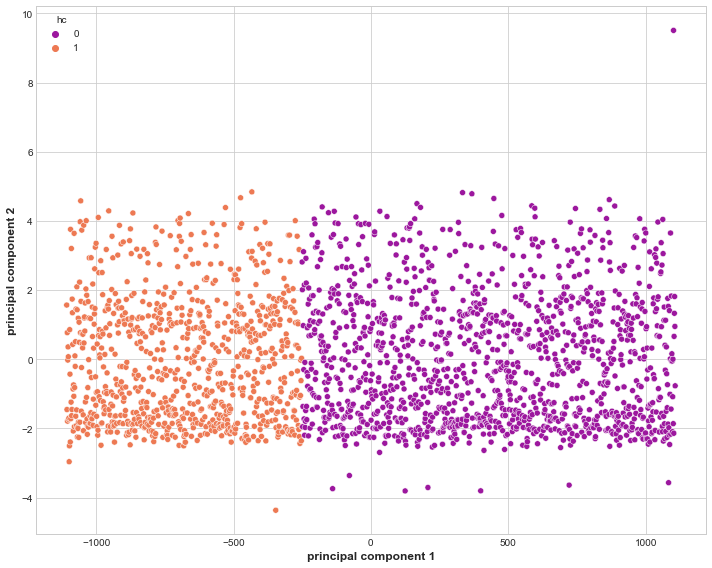

In [68]:
df_hc = pd.concat([final_df, pd.DataFrame({'hc':hc_labels})], axis = 1)
df_hc.head()

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(final_df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['hc'] = df_hc['hc']
plt.figure(figsize=(10,8))
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue='hc', palette='plasma')
plt.show()

In [69]:
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
print("Silhouette Score (KMeans): ", metrics.silhouette_score(final_df, labels))
print("Calinski-Harabasz Index (KMeans): ", metrics.calinski_harabasz_score(final_df, labels))
print("Davies-Bouldin Index (KMeans): ", metrics.davies_bouldin_score(final_df, labels))
print("  ")
print("_"*70)
print("  ")
print("Silhouette Score (Hierarchical Clustering):", silhouette_score(final_df, hc.labels_))
print("Calinski-Harabasz Index (Hierarchical Clustering):", calinski_harabasz_score(final_df, hc.labels_))
print("Davies-Bouldin Index (Hierarchical Clustering):", davies_bouldin_score(final_df, hc.labels_))

Silhouette Score (KMeans):  -0.0006715112743714088
Calinski-Harabasz Index (KMeans):  0.328471656448131
Davies-Bouldin Index (KMeans):  71.05403465125192
  
______________________________________________________________________
  
Silhouette Score (Hierarchical Clustering): 0.5961892487134017
Calinski-Harabasz Index (Hierarchical Clustering): 5460.33463288312
Davies-Bouldin Index (Hierarchical Clustering): 0.500037690297237
